# Polynomial regression
En muchas ocasiones la relación entre los datos no va a ser lineal, por lo que una simple regresión lineal no se va a ajustar bien a nuestra problemática.

Por ejemplo, en el siguiente ejemplo encajaria muy bien una regresión lineal.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('data/salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
X = df[['YearsExperience']]
y = df['Salary']

In [4]:
lin_reg = LinearRegression()

In [5]:
lin_reg.fit(X, y)

LinearRegression()

In [6]:
lin_reg.score(X,y)

0.9569566641435086

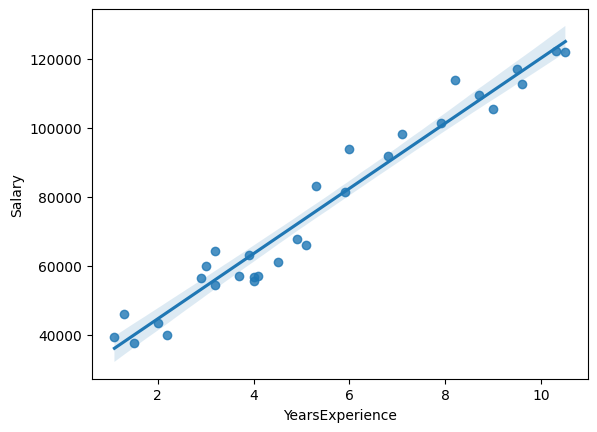

In [7]:
sns.regplot(data = df,
           x = 'YearsExperience',
           y = 'Salary');

En la vida real los problemas son más complejos, ya que los salarios no llevan una subida lineal vs años de experiencia, dependerá también de la carrera profesional: profesor, ingeniero, doctor...

Otra posible representación del salario podría ser en función del puesto de trabajo.

In [8]:
df = pd.read_csv('data/position_salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [9]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [11]:
lin_reg.score(X,y)

0.6690412331929895

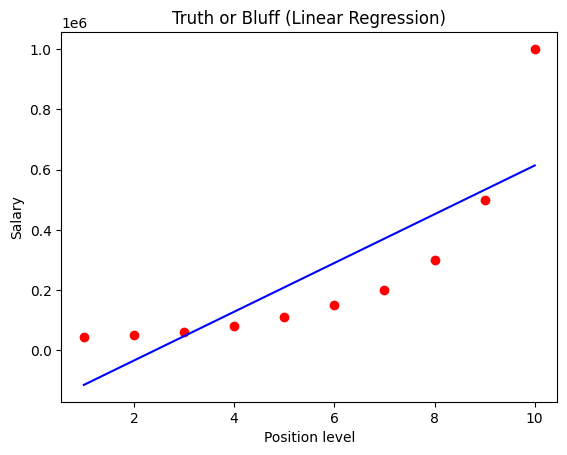

In [12]:
# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

Vemos que en este caso, la regresión lineal no se ajusta nada bien a los datos, por lo que habrá que probar otras alternativas.

C:\Users\misla\AppData\Local\Temp\ipykernel_428\4008593066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y - lin_reg.predict(X));


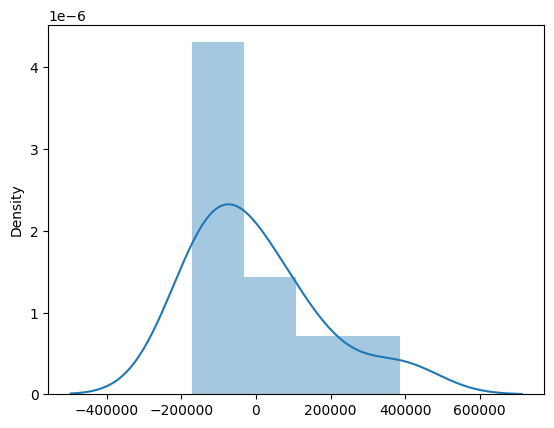

In [13]:
sns.distplot(y - lin_reg.predict(X));

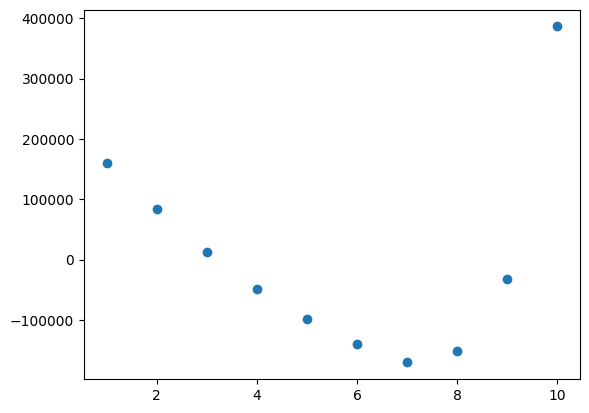

In [14]:
plt.scatter(X, y - lin_reg.predict(X));

`PolynomialFeatures` de sklearn genera nuevas features sintéticas, realizando todas las combinaciones posibles entre las potencias.

Si degree = 2 y tenemos dos features, devolverá: a^0, a^1, b^1, a^2, a\*b, b^2

En nuestro caso tenemos una única variable con degree = 3: a^0, a^1, a^2, a^3

In [15]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(degree = 2)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)


In [17]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [18]:
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [19]:
pol_reg.coef_

array([      0.        , -132871.21212121,   19431.81818182])

`x^0 + x^1 + x^2 + x^3 + x^4 `

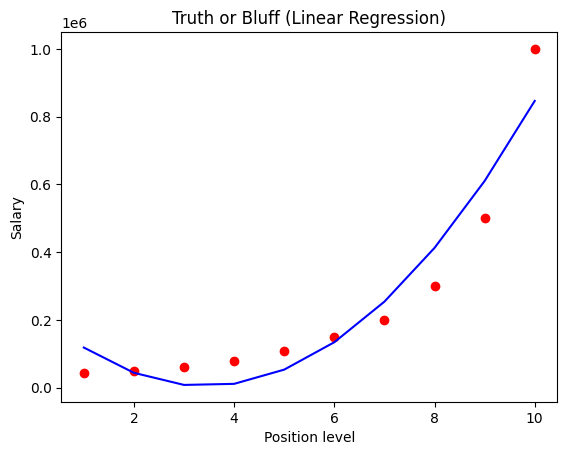

In [20]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(X_poly), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [21]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [22]:
pol_reg.score(X_poly,y)

0.9162082221443943

Al añadir mucha complejidad podemos sobreajustar el modelo fácilmente

In [23]:
print(pol_reg.predict(poly_feats.transform([[7]])))

[254227.27272727]


In [24]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [25]:
print(pol_reg.predict(poly_feats.transform([[7]])))

[254227.27272727]


In [26]:
df = pd.read_csv('data/position_salaries.csv')
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [48]:
from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(degree = 3)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2)

In [29]:
pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)

LinearRegression()

In [30]:
predictions = pol_reg.predict(X_test)

In [31]:
df_preds = pd.DataFrame(predictions, columns = ['predictions'])
df_preds['real_value'] = pd.Series(y_test)

df_preds

,predictions,real_value
0,600714.285714,500000
1,509222.689076,300000


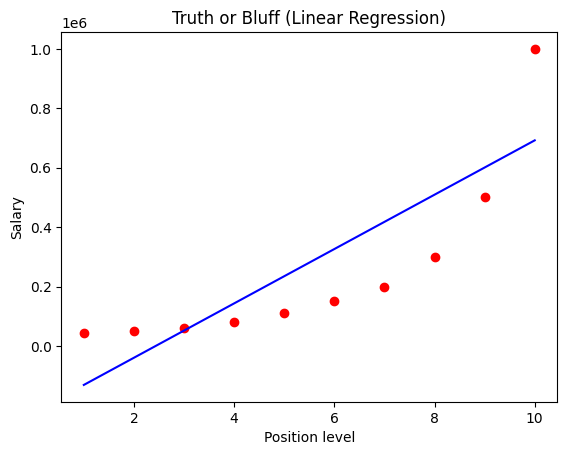

In [32]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(X_poly), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [33]:
pol_reg.score(X_poly,y)

0.645612418734543

# Decisión final

### Regresión lineal

In [34]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=12)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_test)

print("MAE:", mean_absolute_error(y_test, predictions))
print("MAPE:", mean_absolute_percentage_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 117757.35294117642
MAPE: 0.621629901960784
MSE: 16144048713.235283
RMSE: 127059.23308927723


#### Regresión polinómica grado 2

In [37]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

poly_feats = PolynomialFeatures(degree = 2)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)

X_train_poly_2, X_test_poly_2, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=12)

lin_reg_pol2 = LinearRegression()
lin_reg_pol2.fit(X_train_poly_2, y_train)

predictions_pol2 = lin_reg_pol2.predict(X_test_poly_2)

print("MAE:", mean_absolute_error(y_test, predictions_pol2))
print("MAPE:", mean_absolute_percentage_error(y_test, predictions_pol2))
print("MSE:", mean_squared_error(y_test, predictions_pol2))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions_pol2)))

MAE: 80182.39492466257
MAPE: 0.17927570711075813
MSE: 11624413613.806612
RMSE: 107816.57392908852


#### Regresión polinómica grado 3

In [38]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

poly_feats = PolynomialFeatures(degree = 3)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)

X_train_poly_3, X_test_poly_3, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=12)

lin_reg_pol3 = LinearRegression()
lin_reg_pol3.fit(X_train_poly_3, y_train)

predictions_pol3 = lin_reg_pol3.predict(X_test_poly_3)

print("MAE:", mean_absolute_error(y_test, predictions_pol3))
print("MAPE:", mean_absolute_percentage_error(y_test, predictions_pol3))
print("MSE:", mean_squared_error(y_test, predictions_pol3))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions_pol3)))

MAE: 75733.05633498973
MAPE: 0.2650203252032536
MSE: 6468116429.645586
RMSE: 80424.60089826735


#### Predictions with train

In [39]:
predictions_train = lin_reg.predict(X_train)
predictions_train_pol_2 = lin_reg_pol2.predict(X_train_poly_2)
predictions_train_pol_3 = lin_reg_pol3.predict(X_train_poly_3)

## Modelo 1

#### Errors train Linear Regression

In [40]:
print("MAE:", mean_absolute_error(y_train, predictions_train))
print("MAPE:", mean_absolute_percentage_error(y_train, predictions_train))
print("MSE:", mean_squared_error(y_train, predictions_train))
print("RMSE:", np.sqrt(mean_squared_error(y_train, predictions_train)))

MAE: 143207.72058823527
MAPE: 1.0992830650252523
MSE: 30190050551.47058
RMSE: 173752.84329032022


#### Errors test Linear Regression

In [41]:
print("MAE:", mean_absolute_error(y_test, predictions))
print("MAPE:", mean_absolute_percentage_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 117757.35294117642
MAPE: 0.621629901960784
MSE: 16144048713.235283
RMSE: 127059.23308927723


## Modelo 2

#### Errors train pol 2

In [42]:
print("MAE:", mean_absolute_error(y_train, predictions_train_pol_2))
print("MAPE:", mean_absolute_percentage_error(y_train, predictions_train_pol_2))
print("MSE:", mean_squared_error(y_train, predictions_train_pol_2))
print("RMSE:", np.sqrt(mean_squared_error(y_train, predictions_train_pol_2)))

MAE: 71483.61089082732
MAPE: 0.6341653737513907
MSE: 6333479546.65609
RMSE: 79583.16120044548


#### Errors test pol 2

In [43]:
print("MAE:", mean_absolute_error(y_test, predictions_pol2))
print("MAPE:", mean_absolute_percentage_error(y_test, predictions_pol2))
print("MSE:", mean_squared_error(y_test, predictions_pol2))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions_pol2)))

MAE: 80182.39492466257
MAPE: 0.17927570711075813
MSE: 11624413613.806612
RMSE: 107816.57392908852


## Modelo 3

#### Errors train pol 3

In [44]:
print("MAE:", mean_absolute_error(y_train, predictions_train_pol_3))
print("MAPE:", mean_absolute_percentage_error(y_train, predictions_train_pol_3))
print("MSE:", mean_squared_error(y_train, predictions_train_pol_3))
print("RMSE:", np.sqrt(mean_squared_error(y_train, predictions_train_pol_3)))

MAE: 22661.358894360827
MAPE: 0.2467285200671439
MSE: 647062564.5893395
RMSE: 25437.424488130466


#### Errors test pol 3

In [45]:
print("MAE:", mean_absolute_error(y_test, predictions_pol3))
print("MAPE:", mean_absolute_percentage_error(y_test, predictions_pol3))
print("MSE:", mean_squared_error(y_test, predictions_pol3))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions_pol3)))

MAE: 75733.05633498973
MAPE: 0.2650203252032536
MSE: 6468116429.645586
RMSE: 80424.60089826735


In [46]:
poly_feats.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3'], dtype=object)

In [47]:
# Obtiene los coeficientes del modelo
coefficients = lin_reg_pol2.coef_

# Imprime los coeficientes y sus correspondientes características
for feature, coef in zip(poly_feats.get_feature_names_out(input_features=['x']), coefficients[0]):
    print(f"{feature}: {coef:.4f}")

TypeError: 'numpy.float64' object is not iterable